In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Implementation of K-Means
Class `KMeansEM` thực hiện thuật toán K-Means với hai bước chính của phương pháp EM:
1.  **E-Step (Expectation):** Gán mỗi điểm dữ liệu vào tâm cụm gần nhất (dựa trên khoảng cách Euclidean).
2.  **M-Step (Maximization):** Cập nhật lại tâm cụm bằng cách lấy trung bình cộng các điểm thuộc cụm đó.

In [8]:
class KMeansEM:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        #Chọn ngẫu nhiên k điểm làm tâm cụm ban đầu
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for i in range(self.max_iters):
            #E-Step
            #Tính khoảng cách từ mỗi điểm đến các tâm cụm
            #X: (N, 2), centroids: (k, 2) -> distances: (N, k)
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            #M-Step
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            for j in range(self.k):
                if np.isnan(new_centroids[j]).any():
                    new_centroids[j] = X[np.random.choice(len(X))]

            # Kiểm tra hội tụ
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                print(f"Converged at iteration {i}")
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

def plot_clusters(X, model, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=model.labels, cmap='viridis', s=20, alpha=0.6, label='Data Points')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Assignment 1: Standard Distributions
**Yêu cầu:**
Tạo 600 điểm dữ liệu từ 3 phân phối Gaussian $\mathcal{N}(\mu, \Sigma)$ với:
* $\Sigma = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
* $\mu_1 = (2, 2)$, $\mu_2 = (8, 3)$, $\mu_3 = (3, 6)$
* Số lượng: 200 điểm dữ liệu mỗi cụm.

Converged at iteration 6


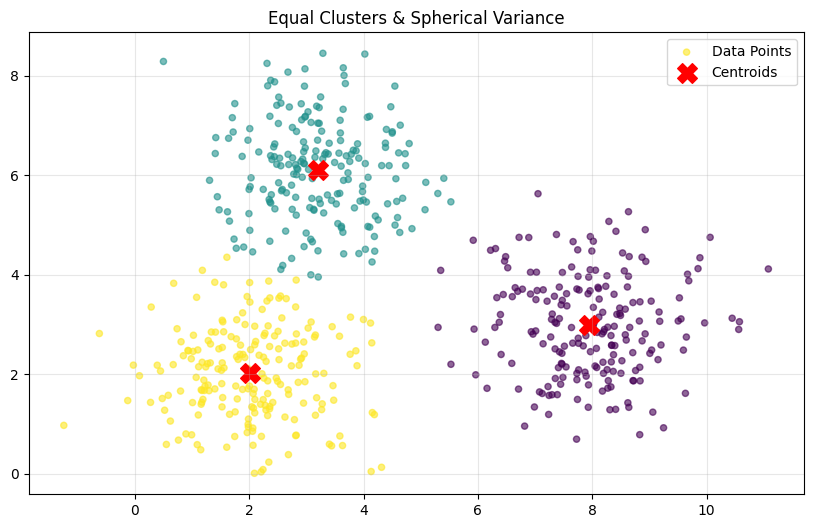

In [9]:
#Tạo dữ liệu
cov = [[1, 0], [0, 1]]
c1 = np.random.multivariate_normal([2, 2], cov, 200)
c2 = np.random.multivariate_normal([8, 3], cov, 200)
c3 = np.random.multivariate_normal([3, 6], cov, 200)
X1 = np.vstack((c1, c2, c3))

# Train Model
kmeans1 = KMeansEM(k=3)
kmeans1.fit(X1)

# Visualize
plot_clusters(X1, kmeans1, "Equal Clusters & Spherical Variance")

**Nhận xét:**
K-Means rất nhạy cảm với việc khởi tạo tâm cụm ngẫu nhiên.
* Nếu các tâm khởi tạo rơi vào vị trí xấu (ví dụ: 2 tâm cùng rơi vào một cụm thật), K-Means có thể hội tụ tại cực trị địa phương (Local Optima) thay vì cực trị toàn cục.
* Điều này dẫn đến kết quả phân cụm không chính xác và thay đổi mỗi lần chạy lại code.

## Assignment 2: Imbalanced Cluster Sizes
**Yêu cầu:**
Nhận xét ảnh hưởng của sự khác nhau về số điểm dữ liệu giữa các cụm của 3 phân phối Gaussian $\mathcal{N}(\mu, \Sigma)$ tới hiệu suất của K-means với:
* $\Sigma = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
* $\mu_1 = (2, 2)$, $\mu_2 = (8, 3)$, $\mu_3 = (3, 6)$
* Số lượng: $\mu_1$ 50 điểm dữ liệu. $\mu_2$ 20 điểm dữ liệu. $\mu_3$ 1000 điểm dữ liệu.

Converged at iteration 21


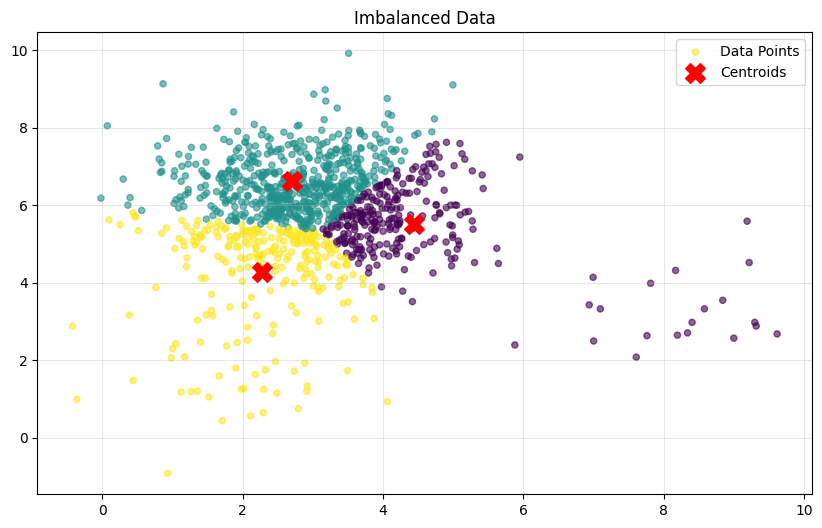

In [10]:
# Tạo dữ liệu
cov = [[1, 0], [0, 1]]
c1_a2 = np.random.multivariate_normal([2, 2], cov, 50)
c2_a2 = np.random.multivariate_normal([8, 3], cov, 20)
c3_a2 = np.random.multivariate_normal([3, 6], cov, 1000)
X2 = np.vstack((c1_a2, c2_a2, c3_a2))

# Train Model
kmeans2 = KMeansEM(k=3)
kmeans2.fit(X2)

# Visualize
plot_clusters(X2, kmeans2, "Imbalanced Data")

**Nhận xét:**
K-Means hoạt động kém hiệu quả trên dữ liệu mất cân bằng.
* K-Means tối ưu hóa hàm mục tiêu là Tổng bình phương sai số (SSE). Do đó, thuật toán sẽ ưu tiên giảm sai số cho cụm lớn (1000 điểm) hơn là cụm nhỏ.
* Kết quả thường thấy là cụm lớn bị "xẻ nhỏ" hoặc cụm nhỏ bị "nuốt chửng" (gộp chung với các điểm ở rìa cụm lớn) để đạt được giá trị SSE nhỏ nhất, dẫn đến ranh giới phân loại không phản ánh đúng cấu trúc thực tế.

## Assignment 3: Anisotropic Distributions
**Yêu cầu:**
Nhận xét hiệu năng của K-Means khi một cụm có phân phối bị kéo dài (Anisotropic) với:
* $\Sigma_1 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
* $\Sigma_2 = \begin{pmatrix} 10 & 0 \\ 0 & 1 \end{pmatrix}$

Converged at iteration 8


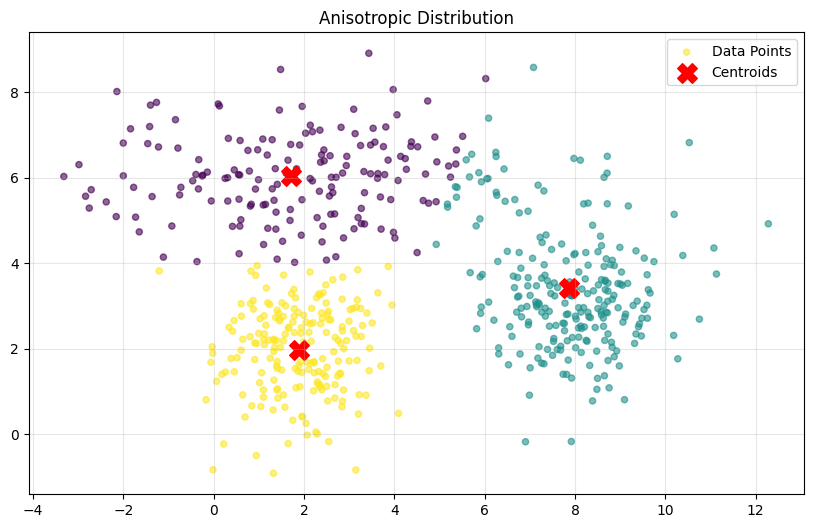

In [11]:
# Tạo dữ liệu
sigma1 = [[1, 0], [0, 1]]
sigma2 = [[10, 0], [0, 1]]

c1_a3 = np.random.multivariate_normal([2, 2], sigma1, 200)
c2_a3 = np.random.multivariate_normal([8, 3], sigma1, 200)
c3_a3 = np.random.multivariate_normal([3, 6], sigma2, 200)
X3 = np.vstack((c1_a3, c2_a3, c3_a3))

# Train Model
kmeans3 = KMeansEM(k=3)
kmeans3.fit(X3)

# Visualize
plot_clusters(X3, kmeans3, "Anisotropic Distribution")

**Nhận xét:**
Đây là nhược điểm lớn nhất của K-Means: Giả định về hình cầu.
* K-Means sử dụng khoảng cách Euclidean, ngầm định rằng các cụm đều có hình tròn và phương sai đồng nhất theo mọi hướng.
* Với cụm thứ 3 (phân phối $\Sigma_2$), dữ liệu có hình elip kéo dài. K-Means không thể mô hình hóa hình dạng này mà chỉ cố gắng cắt dữ liệu thành các khối tròn/đa giác đều.
* Hậu quả: Các điểm ở phần rìa của hình elip sẽ bị phân loại sai sang cụm lân cận.
